In [1]:
from sena.data.norec.dataloader import load_full_dataset
import pandas as pd

In [2]:
data = load_full_dataset()

train = data['train']
val = data['dev']
test = data['test']

combined_data = pd.concat([train, val, test]).reset_index(drop=True)

print(f"Train: {train.shape}")
print(f"Val: {val.shape}")
print(f"Test: {test.shape}")
print(f"Combined: {combined_data.shape}")

Loading multiclass dev data: 100%|██████████| 4360/4360 [00:00<00:00, 6729.35it/s]


Train: (34903, 2)
Val: (4360, 2)
Test: (4351, 2)
Combined: (43614, 2)


In [3]:
combined_data

,text,label
0,Rome S02\nToppen innen tv-drama akkurat nå! \n...,2
1,Twin Peaks - definitive gold box edition\nGull...,2
2,The Wire (sesong 1-4)\nThe Wire vil gjøre deg ...,2
3,"Mad Men (sesong 1)\nStilig, underholdende og s...",2
4,Mad Men (sesong 2)\nTV-underholdning av høyest...,2
...,...,...
43609,Politisk protestpønk fra gamle helter\nGamle h...,2
43610,79-åringen står fortsatt på barrikadene\nBen H...,2
43611,Utseendet teller ikke - eller?\n«Ansiktet» utf...,1
43612,Hektisk homsesex med tårefylte forviklingar\nB...,1


<AxesSubplot:>

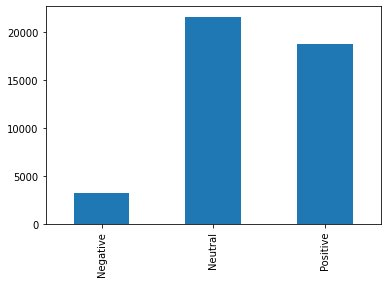

In [4]:
combined_data["label"].replace({0: "Negative", 1: "Neutral", 2: "Positive"}).value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

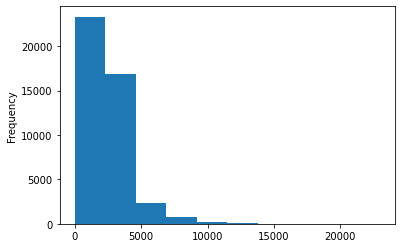

In [6]:
combined_data["text"].str.len().plot.hist()

In [7]:
aggregated_data = combined_data.groupby("label")["text"].apply(" ".join).reset_index()

positive_texts = aggregated_data[aggregated_data["label"] == 2]["text"].values[0]
neutral_texts = aggregated_data[aggregated_data["label"] == 1]["text"].values[0]
negative_texts = aggregated_data[aggregated_data["label"] == 0]["text"].values[0]

In [8]:
from sena.utils.preprocessing import load_stopwords
from collections import Counter
from tqdm import tqdm

stopwords = load_stopwords()

combined_text = (positive_texts + neutral_texts + negative_texts).split(" ")
word_counter = Counter()
for word in tqdm(combined_text, desc="Counting words"):
    if word not in stopwords and word.isalpha():
        word_counter[word] += 1

Counting words: 100%|██████████| 17620539/17620539 [01:13<00:00, 238989.11it/s]


In [9]:
word_counter.most_common(10)

[('får', 33954),
 ('litt', 32275),
 ('to', 27163),
 ('gjør', 26574),
 ('helt', 25044),
 ('kommer', 22050),
 ('godt', 21686),
 ('nok', 19596),
 ('første', 18545),
 ('år', 18388)]

In [10]:
from wordcloud import WordCloud

positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_texts)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_texts)
neutral_wordcloud = WordCloud(stopwords=stopwords).generate(neutral_texts)

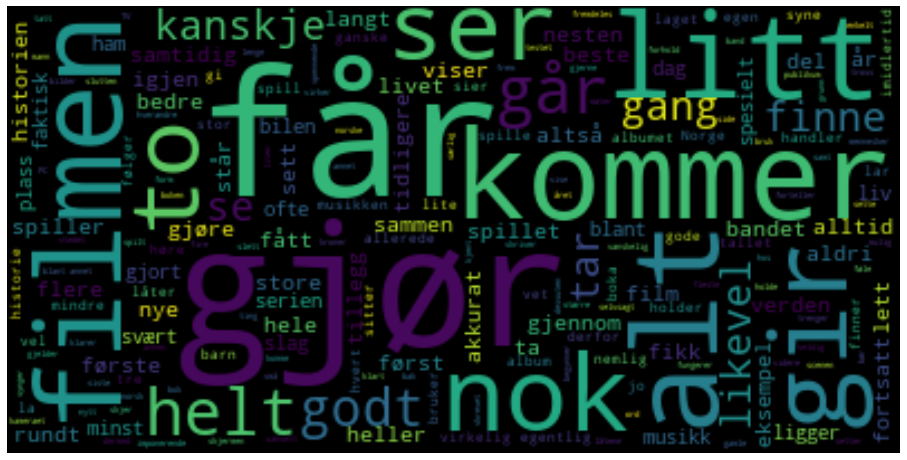

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

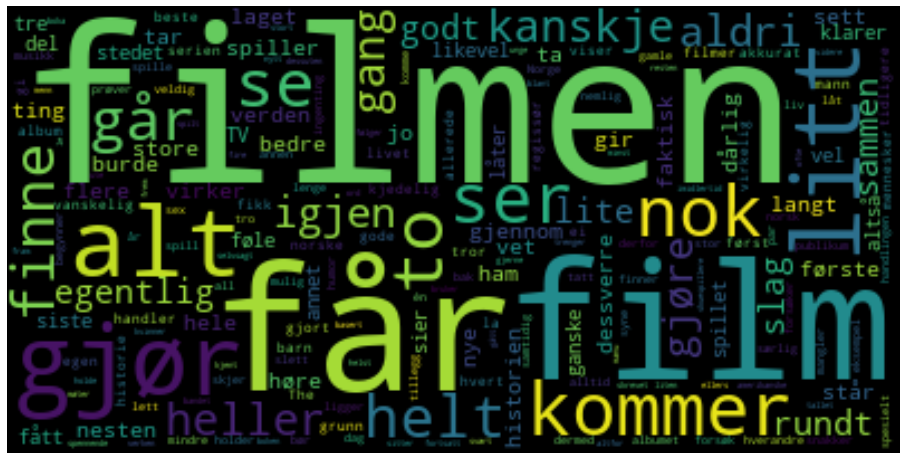

In [12]:
plt.figure(figsize=(16, 9))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

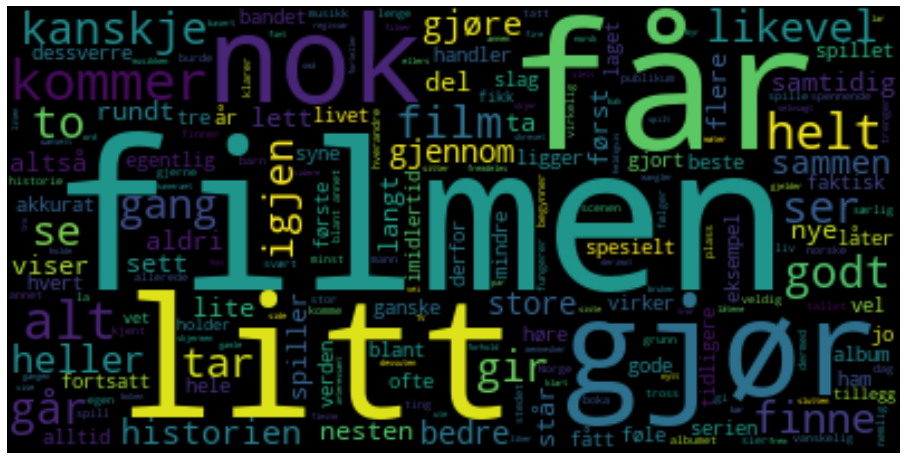

In [13]:
plt.figure(figsize=(16, 9))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()